**import data:**

In [3]:
import pandas as pd

df = pd.read_csv(r'D:\Uni\7\haml\HW\HW7\Divvy_Trips_2014_Q1Q2.csv')
df


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2101444,06/14/2014 15:06,06/15/2014 15:03,2975,86245,239,Western Ave & Leland Ave,92,Carpenter St & Huron St,Customer,NaN,NaN
1,1408433,04/13/2014 09:34,04/14/2014 09:31,2097,86198,207,Emerald Ave & 28th St,207,Emerald Ave & 28th St,Customer,NaN,NaN
2,1368527,04/09/2014 15:01,04/10/2014 14:55,1821,86004,176,Clark St & Elm St,199,Wabash Ave & Grand Ave,Customer,NaN,NaN
3,2335727,06/29/2014 16:04,06/30/2014 15:57,606,85942,192,Canal St & Adams St,122,Ogden Ave & Congress Pkwy,Subscriber,Male,1985.0
4,1288099,03/24/2014 17:43,03/25/2014 17:35,1791,85932,140,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,Subscriber,Male,1971.0
...,...,...,...,...,...,...,...,...,...,...,...,...
905694,1168568,02/08/2014 11:15,02/08/2014 11:16,785,60,204,Prairie Ave & Garfield Blvd,204,Prairie Ave & Garfield Blvd,Subscriber,Male,1983.0
905695,1139202,01/21/2014 09:17,01/21/2014 09:18,2412,60,192,Canal St & Adams St,192,Canal St & Adams St,Subscriber,Male,1985.0
905696,1139026,01/21/2014 07:50,01/21/2014 07:51,2755,60,276,California Ave & North Ave,276,California Ave & North Ave,Subscriber,Male,1982.0
905697,1138375,01/20/2014 16:25,01/20/2014 16:26,1780,60,67,Sheffield Ave & Fullerton Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Female,1966.0


**What is the average travel time of bicycles in the entire network?**

In [2]:
mean_X = df['tripduration'].mean()
mean_durations = (df.groupby('bikeid')['tripduration'].mean()).mean()
print('Average duration for each trip :',mean_X)
print('Average duration for each bike :',mean_durations)

Average duration for each trip : 1073.3214931229911
Average duration for each bike : 1067.7404885827038


**Minimum and maximum travel time occurred between which pairs of stations in the network?**

In [5]:
t1 = df.groupby(['to_station_name', 'from_station_name'])['tripduration'].sum()
t1 = t1.rename_axis(['station_1', 'station_2'])

t2 = df.groupby(['from_station_name', 'to_station_name'])['tripduration'].sum()
t2 = t2.rename_axis(['station_1', 'station_2'])

t = t1.add(t2, fill_value=0)

t = t.reset_index()

m = pd.pivot_table(t, 
                   index='station_1', 
                   columns='station_2',
                   values='tripduration')
m = m.fillna(0)


t.loc[ t['station_1'] == t['station_2'], 'tripduration' ] /= 2
t['stations'] = " ( " + t['station_2'].astype(str) + " " + " and " + " " + t['station_1'].astype(str) + " ) " 
t = t.drop(columns=['station_1','station_2'])

t_grp = t.groupby('stations')

agg_result = t_grp['tripduration'].agg(['max', 'min']) 

max_row = agg_result['max'].idxmax() 
min_row = agg_result['min'].idxmin()

print(f'longest travel time:{max_row} - Travel time: {agg_result["max"][max_row]}')
print(f'shortest travel time:{min_row} - Travel time: {agg_result["min"][min_row]}')


longest travel time: ( Lake Shore Dr & Monroe St  and  Streeter Dr & Illinois St )  - Travel time: 5546258.0
shortest travel time: ( Clinton St & 18th St  and  Normal Ave & Archer Ave )  - Travel time: 337.0


**Which production station has traveled more?**

In [7]:
max1_repeated_count = df['from_station_name'].value_counts().max()
max1_repeated_station = df['from_station_name'].value_counts().idxmax()

print(f"The most travel production is: {max1_repeated_station}"  )
print(f"Number of trip production: {max1_repeated_count}")


The most travel production is: Streeter Dr & Illinois St
Number of trip production: 19512


**Which station attracted more trips?**

In [8]:
max2_repeated_count = df['to_station_name'].value_counts().max()
max2_repeated_station = df['to_station_name'].value_counts().idxmax()

print(f"The most travel attraction is: {max2_repeated_station}"  )
print(f"Number of trip attraction: {max2_repeated_count}")


The most travel attraction is: Streeter Dr & Illinois St
Number of trip attraction: 24416


The minimum and maximum bicycle traffic between which pairs of stations in the network occurred?

In [11]:
w1 = df.groupby(['to_station_name', 'from_station_name']).size().rename('count'
              ).reset_index().set_index(['to_station_name', 'from_station_name'])
w1 = w1.rename_axis(['station_1', 'station_2'])

w2 = df.groupby(['from_station_name', 'to_station_name']).size().rename('count'
              ).reset_index().set_index([ 'from_station_name' , 'to_station_name' ])
w2 = w2.rename_axis(['station_1', 'station_2'])

w = w1.add(w2, fill_value=0)

w = w.reset_index()

m = pd.pivot_table(w, 
                   index='station_1', 
                   columns='station_2',
                   values='count')
m = m.fillna(0)


w.loc[w['station_1'] == w['station_2'], 'count'] /= 2
w['stations'] = " ( " + w['station_2'].astype(str) + " " + " and " + " " + w['station_1'].astype(str) + " ) "
w = w.drop(columns=['station_1', 'station_2'])

w_grp = w.groupby('stations')

agg_result = w_grp['count'].agg(['max', 'min'])

max_row = agg_result['max'].idxmax()
min_row = agg_result['min'].idxmin()

print(f'The Maximum bicycle traffic: {max_row} - bicycle traffic: {agg_result["max"][max_row]}')
print(f'The Minimum bicycle traffic: {min_row} - bicycle traffic: {agg_result["min"][min_row]}')


The Maximum bicycle traffic:  ( Lake Shore Dr & Monroe St  and  Streeter Dr & Illinois St )  - bicycle traffic: 4823.0
The Minimum bicycle traffic:  ( 900 W Harrison  and  Ashland Ave & Augusta Blvd )  - bicycle traffic: 1.0


**by the number of trips :**

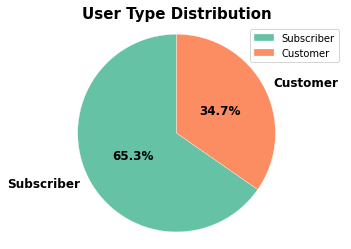

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['usertype'].value_counts()

plt.figure(figsize=(6, 4))
colors = sns.color_palette("Set2")
wedges, texts, autotexts = plt.pie(counts.values,
                                   labels=counts.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   wedgeprops={'linewidth': 0.3, 'edgecolor': 'white'},
                                   textprops={'fontsize': 12, 'fontweight': 'bold'},
                                   pctdistance=0.5,
                                   colors=colors)

plt.title('User Type Distribution', fontsize=15, fontweight='bold')

plt.setp(autotexts, size=12, weight='bold')

plt.axis('equal')

plt.legend(wedges, counts.index, loc="best")

plt.show()

**By the number of trips on different days :**

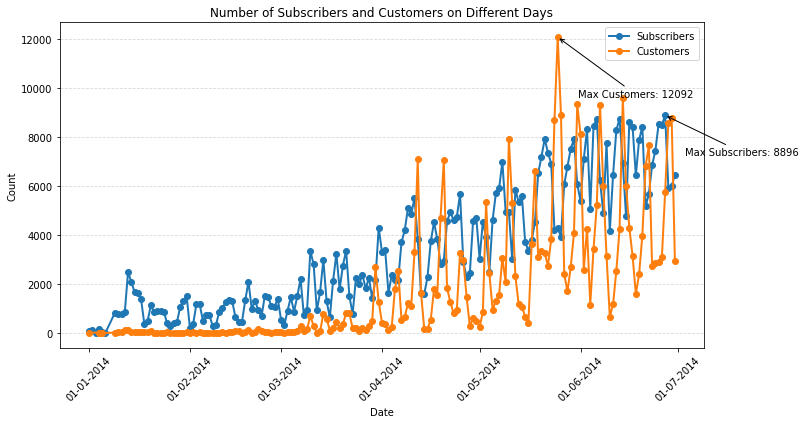

In [13]:
from matplotlib.dates import DateFormatter

df1 = df.copy()

df1['starttime'] = pd.to_datetime(df1['starttime'], format='%m/%d/%Y %H:%M')
df1['starttime'] = pd.to_datetime(df1['starttime']).dt.date

subscriber_data = df1[df1['usertype'] == 'Subscriber']
customer_data = df1[df1['usertype'] == 'Customer']

subscriber_counts = subscriber_data.groupby(subscriber_data['starttime']).size()
customer_counts = customer_data.groupby(customer_data['starttime']).size()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(subscriber_counts.index, subscriber_counts, label='Subscribers', marker='o', linestyle='-', linewidth=2)
ax.plot(customer_counts.index, customer_counts, label='Customers', marker='o', linestyle='-', linewidth=2)

date_formatter = DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_formatter)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Subscribers and Customers on Different Days')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add annotations to the lines
ax.annotate(f"Max Subscribers: {subscriber_counts.max()}",
            xy=(subscriber_counts.idxmax(), subscriber_counts.max()),
            xytext=(20, -40),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black'))

ax.annotate(f"Max Customers: {customer_counts.max()}",
            xy=(customer_counts.idxmax(), customer_counts.max()),
            xytext=(20, -60),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black'))

plt.show()

**By the number of trips on different hours :**

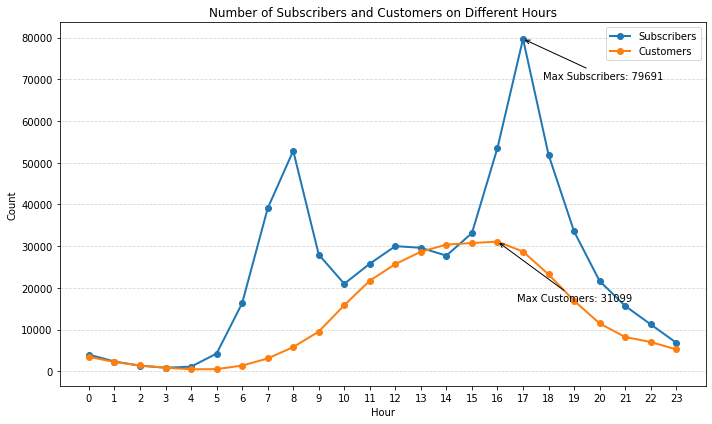

In [14]:
from matplotlib.dates import DateFormatter

df9 = df.copy()

df9['starttime'] = pd.to_datetime(df9['starttime'], format='%m/%d/%Y %H:%M')
df9['starttime'] = pd.to_datetime(df9['starttime']).dt.hour

subscriber_data = df9[df9['usertype'] == 'Subscriber']
customer_data = df9[df9['usertype'] == 'Customer']

subscriber_counts = subscriber_data.groupby(subscriber_data['starttime']).size()
customer_counts = customer_data.groupby(customer_data['starttime']).size()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(subscriber_counts.index, subscriber_counts, label='Subscribers', marker='o', linestyle='-', linewidth=2)
ax.plot(customer_counts.index, customer_counts, label='Customers', marker='o', linestyle='-', linewidth=2)

ax.set_xticks(range(0, 24))
ax.set_xlabel('Hour')

plt.ylabel('Count')
plt.title('Number of Subscribers and Customers on Different Hours')
plt.legend()
plt.tight_layout()

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add annotations to the lines
ax.annotate(f"Max Subscribers: {subscriber_counts.max()}",
            xy=(subscriber_counts.idxmax(), subscriber_counts.max()),
            xytext=(20, -40),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black'))

ax.annotate(f"Max Customers: {customer_counts.max()}",
            xy=(customer_counts.idxmax(), customer_counts.max()),
            xytext=(20, -60),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='black'))

plt.show()

**By the trip duration :**

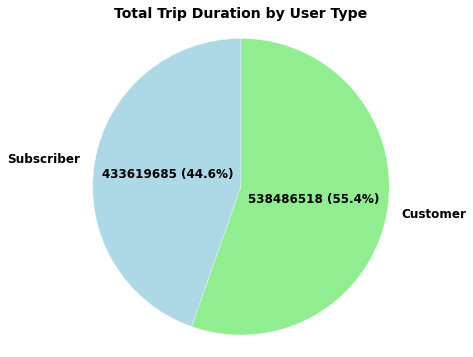

In [15]:
import matplotlib.pyplot as plt

subscriber_duration = df[df['usertype'] == 'Subscriber']['tripduration'].sum()
customer_duration = df[df['usertype'] == 'Customer']['tripduration'].sum()

data = [subscriber_duration, customer_duration]
labels = ['Subscriber', 'Customer']

plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightgreen']
wedges, texts, autotexts = plt.pie(data,
                                   labels=labels,
                                   startangle=90,
                                   wedgeprops={'linewidth': 0.3, 'edgecolor': 'white'},
                                   autopct=lambda pct: f'{data[int(pct/100 * len(data))]} ({pct:.1f}%)',
                                   textprops={'fontsize': 12, 'fontweight': 'bold'},
                                   pctdistance=0.5,
                                   colors=colors)

plt.title('Total Trip Duration by User Type', fontsize=14, fontweight='bold')

plt.setp(autotexts, size=12, weight='bold')
plt.axis('equal')

plt.show()

**Distribution of Trip Duration by User Type :**

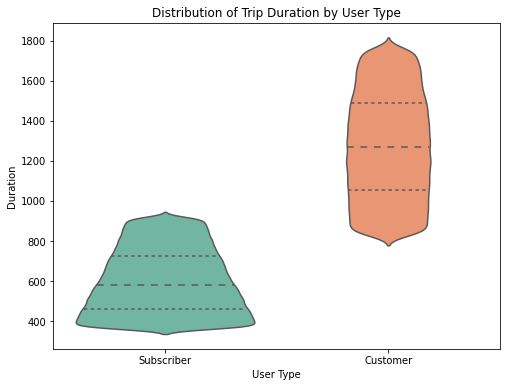

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df4 = df.copy()

subscriber_data = df[df['usertype'] == 'Subscriber']
customer_data = df[df['usertype'] == 'Customer']

quartiles_subscriber = np.percentile(subscriber_data['tripduration'], [25, 50, 75])
quartiles_customer = np.percentile(customer_data['tripduration'], [25, 50, 75])

subscriber_data = subscriber_data[(subscriber_data['tripduration'] >= quartiles_subscriber[0]) & (subscriber_data['tripduration'] <= quartiles_subscriber[2])]
customer_data = customer_data[(customer_data['tripduration'] >= quartiles_customer[0]) & (customer_data['tripduration'] <= quartiles_customer[2])]

plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
sns.violinplot(x='usertype', y='tripduration', data=pd.concat([subscriber_data, customer_data]), inner="quartile")

plt.title('Distribution of Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration')

plt.show()

**Ratio of Subscriber to Customer Trips by Month:**

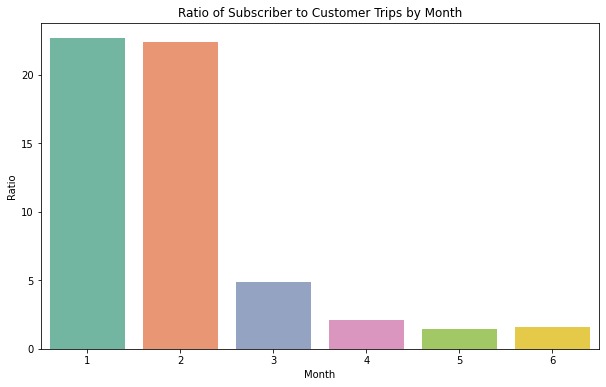

In [17]:
import seaborn as sns
import pandas as pd

df2 = df.copy()
df2['starttime'] = pd.to_datetime(df2['starttime'])

df2['month'] = df2['starttime'].dt.month

counts = df2.groupby(['month', 'usertype']).size().unstack()

counts['Ratio'] = counts['Subscriber'] / counts['Customer']

plt.figure(figsize=(10, 6))
sns.set_palette("Set2")
sns.barplot(x=counts.index, y='Ratio', data=counts)

plt.title('Ratio of Subscriber to Customer Trips by Month')
plt.xlabel('Month')
plt.ylabel('Ratio')

plt.show()

**The maximum and minimum number of trips in each route for each use type:**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


subscriber_counts_from = df[df['usertype'] == 'Subscriber']['from_station_name'].value_counts()
customer_counts_from = df[df['usertype'] == 'Customer']['from_station_name'].value_counts()

subscriber_counts_to = df[df['usertype'] == 'Subscriber']['to_station_name'].value_counts()
customer_counts_to = df[df['usertype'] == 'Customer']['to_station_name'].value_counts()

max_subscriber_from = subscriber_counts_from.idxmax()
min_subscriber_from = subscriber_counts_from.idxmin()

max_customer_from = customer_counts_from.idxmax()
min_customer_from = customer_counts_from.idxmin()

max_subscriber_to = subscriber_counts_to.idxmax()
min_subscriber_to = subscriber_counts_to.idxmin()

max_customer_to = customer_counts_to.idxmax()
min_customer_to = customer_counts_to.idxmin()

print(f"Max Subscriber From Station: {max_subscriber_from}")
print(f"Min Subscriber From Station: {min_subscriber_from}")
print(f"Max Customer From Station: {max_customer_from}")
print(f"Min Customer From Station: {min_customer_from}")
print(f"Max Subscriber To Station: {max_subscriber_to}")
print(f"Min Subscriber To Station: {min_subscriber_to}")
print(f"Max Customer To Station: {max_customer_to}")
print(f"Min Customer To Station: {min_customer_to}")

Max Subscriber From Station: Clinton St & Washington Blvd
Min Subscriber From Station: Damen Ave & Coulter St
Max Customer From Station: Streeter Dr & Illinois St
Min Customer From Station: Western Ave & 24th St
Max Subscriber To Station: Clinton St & Washington Blvd
Min Subscriber To Station: Cottage Grove Ave & 51st St
Max Customer To Station: Streeter Dr & Illinois St
Min Customer To Station: Western Ave & 24th St


**Daily and monthly Bike Share Counts by User Type:**

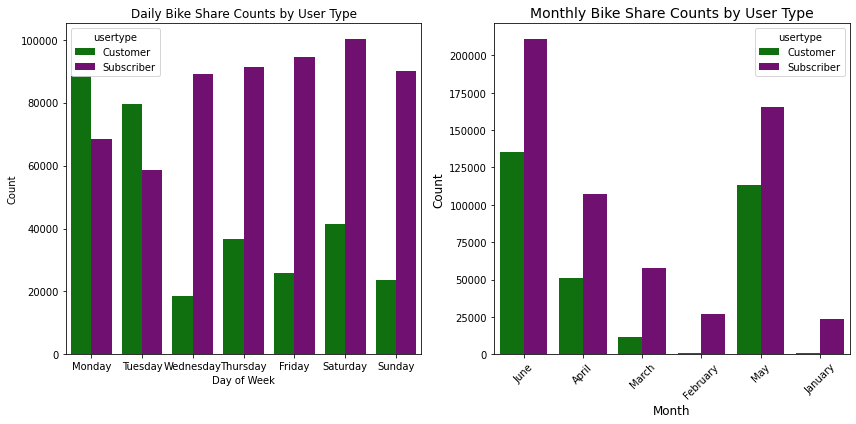

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df5 = df.copy()
df5['starttime'] = pd.to_datetime(df5['starttime'])
df5['month'] = df5['starttime'].dt.month_name()
df5['weekday'] = df5['starttime'].dt.day_name()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df5, x='weekday', hue='usertype', palette=['green', 'purple'])
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), day_names)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Daily Bike Share Counts by User Type')

plt.subplot(1, 2, 2)
sns.countplot(data=df5, x='month', hue='usertype', palette=['green', 'purple'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Monthly Bike Share Counts by User Type', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

**Count of Customers and Subscribers by Age:**

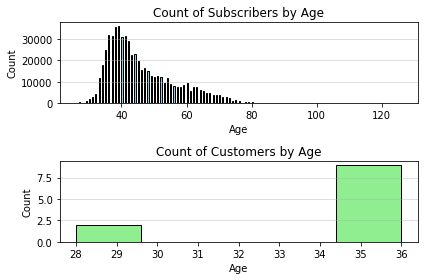

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df7 = df.copy()
df7['age'] = 2024 - df7['birthyear']

subscriber_data = df7[df7['usertype'] == 'Subscriber']['age']
customer_data = df7[df7['usertype'] == 'Customer']['age']

plt.subplot(2, 1, 1)
plt.hist(subscriber_data, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Subscribers by Age')
plt.grid(axis='y', alpha=0.5)

plt.subplot(2, 1, 2)
plt.hist(customer_data, bins='auto', color='lightgreen', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Customers by Age')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()


**count of trips by usertype and gender:**

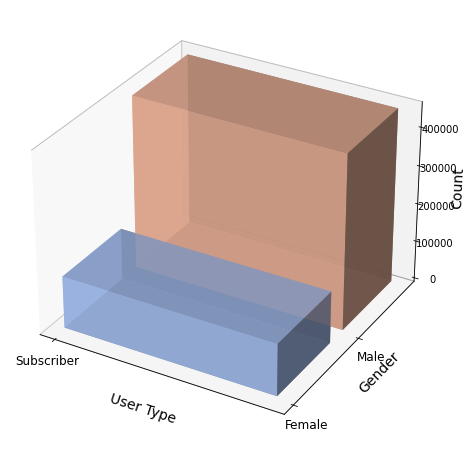

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df8 = df.copy()
df8.dropna(subset=['usertype', 'gender'], inplace=True)

grouped_df = df.groupby(['usertype', 'gender']).size().reset_index(name='Count')

usertype_labels, usertype_codes = pd.factorize(grouped_df['usertype'])
gender_labels, gender_codes = pd.factorize(grouped_df['gender'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = usertype_labels
y = gender_labels
z = grouped_df['Count']

colors = sns.color_palette('coolwarm', len(z))

ax.bar3d(x, y, 0, 0.8, 0.8, z, shade=True, alpha=0.8, color=colors)

ax.set_xticks(range(len(usertype_codes)))
ax.set_xticklabels(usertype_codes, fontsize=12, ha='center')
ax.set_yticks(range(len(gender_codes)))
ax.set_yticklabels(gender_codes, fontsize=12, ha='center')

ax.set_xlabel('User Type', fontsize=14)
ax.set_ylabel('Gender', fontsize=14)
ax.set_zlabel('Count', fontsize=14)

ax.xaxis.label.set_position((0.5, -0.1))
ax.yaxis.label.set_position((-0.1, 0.5))

ax.grid(False)
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')
ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)
ax.zaxis.set_tick_params(length=0)

plt.show()
